In [3]:
import pandas as pd
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [7]:
df = pd.read_csv("Nacimientos_porcentaje.csv", encoding='latin1')
df.head()

,Unnamed: 0,CVEGEO,NOM_ENT,NOM_MUN,Poblacion_total,Poblacion_total_Femenina,Poblacion_total_Femenina_11A17,Poblacion_total_Femenina_18A20,Poblacion_total_Femenina_11A20,Conteo_nacimientos,Porcentaje_nacimientos,Porcentaje_libre,area
0,1,1001,Aguascalientes,Aguascalientes,949902.0,486550.0,56207.0,24461.0,80668.0,2269.0,2.812763,97.187237,1.176169e+09
1,2,1002,Aguascalientes,Asientos,51779.0,26217.0,3807.0,1549.0,5356.0,204.0,3.808813,96.191187,5.494835e+08
2,3,1003,Aguascalientes,Calvillo,58423.0,29665.0,3824.0,1585.0,5409.0,132.0,2.440377,97.559623,9.479951e+08
3,4,1004,Aguascalientes,Cosío,17130.0,8684.0,1159.0,528.0,1687.0,72.0,4.267931,95.732069,1.300692e+08
4,5,1005,Aguascalientes,Jesús María,130165.0,65612.0,8831.0,3740.0,12571.0,336.0,2.672818,97.327182,5.583340e+08


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model

# 1. Leer el archivo CSV
df = pd.read_csv("Nacimientos_porcentaje.csv")

# 2. Filtrar solo columnas necesarias y limpiar datos
df = df[['NOM_MUN', 'Poblacion_total']].copy()
df.dropna(subset=['Poblacion_total'], inplace=True)
df['Poblacion_total'] = pd.to_numeric(df['Poblacion_total'], errors='coerce')
df.dropna(subset=['Poblacion_total'], inplace=True)

# 3. Estandarizar la variable de población
scaler = StandardScaler()
X = scaler.fit_transform(df[['Poblacion_total']])

# 4. Aplicar KMeans
clusterNum = 5
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=10, random_state=42)
k_means.fit(X)
labels = k_means.labels_
df["Grupo_Municipio"] = labels

# 5. Calcular los rangos por grupo y ordenarlos
group_ranges = df.groupby("Grupo_Municipio")["Poblacion_total"].agg(['min', 'max'])
group_ranges = group_ranges.sort_values(by='min')
print("Rangos de población por grupo (ordenados):\n", group_ranges)

# 6. Obtener límites para la gráfica
min_limits = group_ranges['min'].values
max_limit = group_ranges['max'].max()

# 7. Graficar puntos
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Poblacion_total'], c=df["Grupo_Municipio"], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Índice del Municipio', fontsize=14)
plt.ylabel('Población Total', fontsize=14)
plt.title('Clusters de Municipios por Población', fontsize=16)

# 8. Añadir eje secundario con marcas en los límites
secax = plt.gca().secondary_yaxis('right')
secax.set_yticks(np.append(min_limits, max_limit))
secax.set_yticklabels([f"{int(limit):,}" for limit in np.append(min_limits, max_limit)], fontsize=10)
secax.set_ylabel('Límites por grupo', fontsize=12)

# 9. Añadir líneas horizontales divisorias
for limit in min_limits:
    plt.axhline(y=limit, color='black', linestyle='--', linewidth=1)
plt.axhline(y=max_limit, color='black', linestyle='-', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 662: invalid continuation byte

Rangos de población por grupo (ordenados):
                        min        max
Grupo_Municipio                      
4                62.995595  74.436090
3                86.111111  93.445378
1                93.467819  95.844670
2                95.845697  97.352747
0                97.353846  99.883586


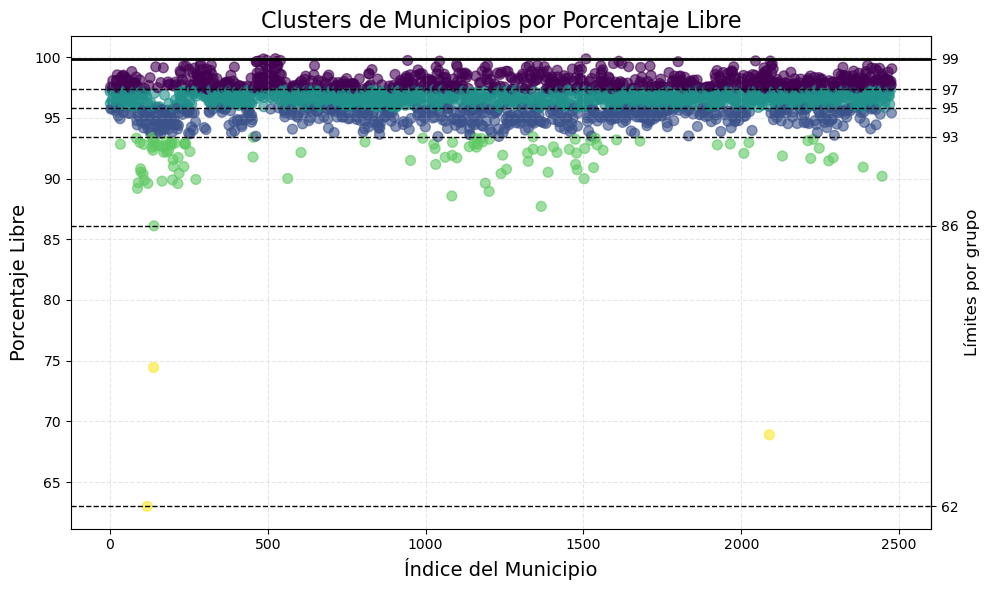

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import linear_model

# 1. Leer el archivo CSV
df = pd.read_csv("Nacimientos_porcentaje.csv")

# 2. Filtrar solo columnas necesarias y limpiar datos
df = df[['NOM_MUN', 'Porcentaje_libre']].copy()
df.dropna(subset=['Porcentaje_libre'], inplace=True)
df['Porcentaje_libre'] = pd.to_numeric(df['Porcentaje_libre'], errors='coerce')
df.dropna(subset=['Porcentaje_libre'], inplace=True)

# 3. Estandarizar la variable de porcentaje
scaler = StandardScaler()
X = scaler.fit_transform(df[['Porcentaje_libre']])

# 4. Aplicar KMeans
clusterNum = 5
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=10, random_state=42)
k_means.fit(X)
labels = k_means.labels_
df["Grupo_Municipio"] = labels

# 5. Calcular los rangos por grupo y ordenarlos
group_ranges = df.groupby("Grupo_Municipio")["Porcentaje_libre"].agg(['min', 'max'])
group_ranges = group_ranges.sort_values(by='min')
print("Rangos de población por grupo (ordenados):\n", group_ranges)

# 6. Obtener límites para la gráfica
min_limits = group_ranges['min'].values
max_limit = group_ranges['max'].max()

# 7. Graficar puntos
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Porcentaje_libre'], c=df["Grupo_Municipio"], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Índice del Municipio', fontsize=14)
plt.ylabel('Porcentaje Libre', fontsize=14)
plt.title('Clusters de Municipios por Porcentaje Libre', fontsize=16)

# 8. Añadir eje secundario con marcas en los límites
secax = plt.gca().secondary_yaxis('right')
secax.set_yticks(np.append(min_limits, max_limit))
secax.set_yticklabels([f"{int(limit):,}" for limit in np.append(min_limits, max_limit)], fontsize=10)
secax.set_ylabel('Límites por grupo', fontsize=12)

# 9. Añadir líneas horizontales divisorias
for limit in min_limits:
    plt.axhline(y=limit, color='black', linestyle='--', linewidth=1)
plt.axhline(y=max_limit, color='black', linestyle='-', linewidth=2)

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()